# Import Packages

In [48]:
    from tensorflow.keras.datasets import cifar10
    import numpy as np
    from tensorflow.keras import Sequential, layers
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Import dummy dataset to test the model

In [3]:
(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

labels = ['airplane', 
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

In [38]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]

# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

{0: 491,
 1: 506,
 2: 501,
 3: 511,
 4: 523,
 5: 479,
 6: 471,
 7: 489,
 8: 527,
 9: 502}

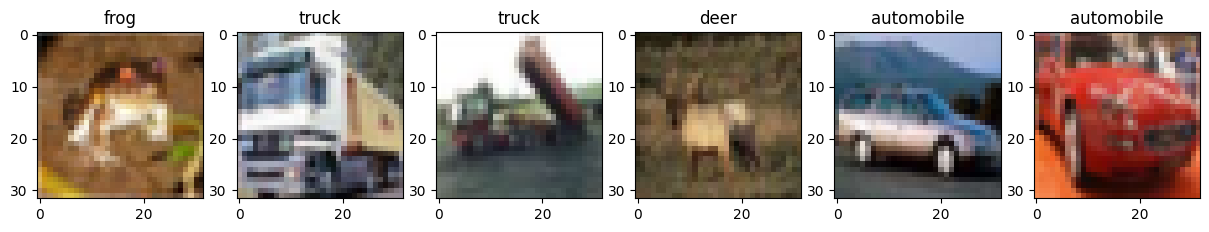

In [5]:
# Display the images
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train[i]
    label = labels_train[i][0]
    plt.imshow(img)
    plt.title(labels[label])

# Simple Image Preprocessing

Here we are going to do a simple preprocessing that should be tested. 

Depending on the model's performance this preprocessing should be improved with image data augmentation

In [83]:
### Normalizing pixels' intensities
X_train_small = images_train_small / 255.
X_test_small = images_test_small / 255.

### Encoding the labels
y_train_small = to_categorical(labels_train_small, 10)
y_test_small = to_categorical(labels_test_small, 10)

# Model Architeture and Compiling

In [84]:
#librAI Model
def initialize_librai():
    
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation = 'softmax'))
    
    return model

In [85]:
model = initialize_librai()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 8, 8, 32)         

In [86]:
# Model Compiling

def compile_librai(model):
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

# Model Instantiating and Training

In [87]:
model_small = initialize_librai()
model_small = compile_librai(model)

es = EarlyStopping(patience = 5, verbose = 2, restore_best_weights=True)

history_small = model_small.fit(X_train_small, y_train_small, 
                    validation_split = 0.2,
                    callbacks = [es], 
                    epochs = 100, 
                    batch_size = 32)

Epoch 1/100
125/125 [==============================] - 4s 28ms/step - loss: 2.2287 - accuracy: 0.1615 - val_loss: 2.1380 - val_accuracy: 0.2400
Epoch 2/100
125/125 [==============================] - 3s 22ms/step - loss: 1.9736 - accuracy: 0.2645 - val_loss: 1.8996 - val_accuracy: 0.3430
Epoch 3/100
125/125 [==============================] - 3s 20ms/step - loss: 1.8559 - accuracy: 0.3072 - val_loss: 1.8403 - val_accuracy: 0.3830
Epoch 4/100
125/125 [==============================] - 3s 21ms/step - loss: 1.7595 - accuracy: 0.3623 - val_loss: 1.7336 - val_accuracy: 0.4090
Epoch 5/100
125/125 [==============================] - 3s 23ms/step - loss: 1.7038 - accuracy: 0.3745 - val_loss: 1.6720 - val_accuracy: 0.4210
Epoch 6/100
125/125 [==============================] - 3s 23ms/step - loss: 1.6542 - accuracy: 0.3780 - val_loss: 1.7010 - val_accuracy: 0.3970
Epoch 7/100
125/125 [==============================] - 3s 21ms/step - loss: 1.6191 - accuracy: 0.4002 - val_loss: 1.6281 - val_accuracy:

# Plot Training History

No need to pass this section to main code

In [88]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

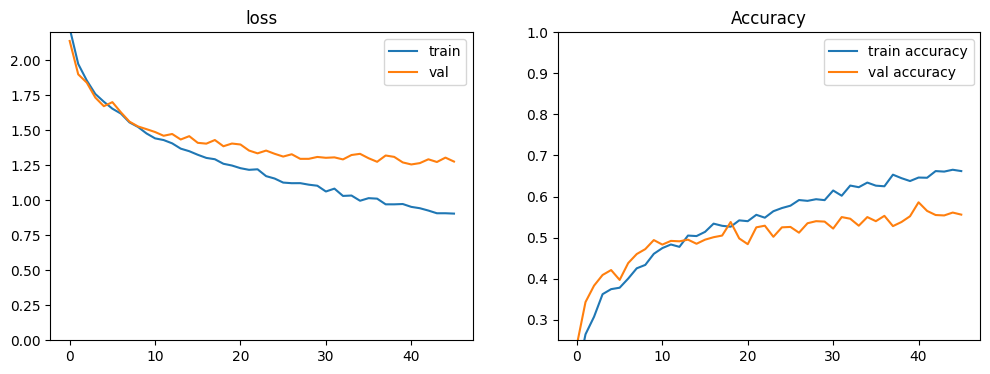

In [89]:
plot_history(history_small)
plt.show()

# Model Evaluation

In [98]:
# Model Evaluation

res = model.evaluate(X_test_small, y_test_small, verbose = 0)

print(f'The accuracy is {res[1]*100:.3f}% compared to a chance level of {1./len(labels)*100}%') # when dataset is plugged we will need to 

The accuracy is 54.700% compared to a chance level of 10.0%


In [91]:
y_pred = model.predict(X_test_small)

32/32 [==============================] - 1s 12ms/step


# Model Prediction

In [95]:
def translate_output(y_pred):
    max_index = np.argmax(y_pred,axis=1)
    translated_output = [labels[idx] for idx in max_index]
    return translated_output

In [96]:
translate_output(y_pred)

['cat',
 'horse',
 'cat',
 'frog',
 'horse',
 'bird',
 'automobile',
 'automobile',
 'cat',
 'frog',
 'frog',
 'deer',
 'frog',
 'ship',
 'cat',
 'airplane',
 'deer',
 'frog',
 'bird',
 'ship',
 'automobile',
 'dog',
 'deer',
 'ship',
 'frog',
 'automobile',
 'horse',
 'deer',
 'horse',
 'ship',
 'cat',
 'airplane',
 'truck',
 'cat',
 'bird',
 'automobile',
 'cat',
 'horse',
 'automobile',
 'deer',
 'ship',
 'frog',
 'frog',
 'bird',
 'horse',
 'frog',
 'frog',
 'horse',
 'cat',
 'truck',
 'airplane',
 'horse',
 'frog',
 'frog',
 'ship',
 'deer',
 'truck',
 'horse',
 'ship',
 'dog',
 'horse',
 'horse',
 'cat',
 'truck',
 'automobile',
 'horse',
 'airplane',
 'deer',
 'cat',
 'ship',
 'truck',
 'horse',
 'airplane',
 'automobile',
 'airplane',
 'automobile',
 'airplane',
 'truck',
 'bird',
 'horse',
 'truck',
 'ship',
 'automobile',
 'frog',
 'airplane',
 'automobile',
 'automobile',
 'ship',
 'truck',
 'automobile',
 'automobile',
 'dog',
 'horse',
 'frog',
 'dog',
 'deer',
 'truck',
 

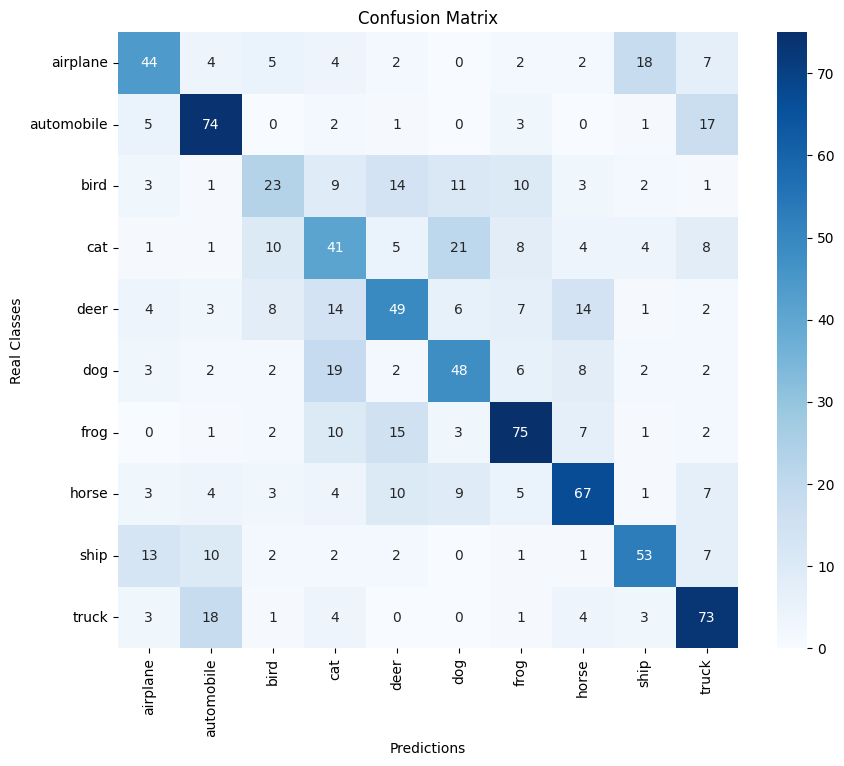

In [97]:
#Translating predictions
y_pred_classes = translate_output(y_pred)
y_test_classes = translate_output(y_test_small)

# Calculating Confusion Matrix
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predictions')
plt.ylabel('Real Classes')
plt.title('Confusion Matrix')
plt.show()